In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
def read_and_filter_data(path):
    """
    读取Pickle文件并合并数据，然后通过四分位数计算经纬度范围，排除不在范围内的数据点。

    Parameters:
        path (str): Pickle文件所在的目录路径。

    Returns:
        pd.DataFrame: 经过过滤后的数据。
    """
    # 读取Pickle文件
    start_time = time.time()  # 开始计时
    combined = pd.read_pickle(path)
    end_time = time.time()  # 结束计时
    elapsed_time = end_time - start_time  # 计算读取时间
    print(f"Time taken to read the Pickle file: {elapsed_time:.2f} seconds")

    # 计算经度和纬度的四分位数范围
    longitude_q1 = combined['longitude'].quantile(0.25)
    longitude_q3 = combined['longitude'].quantile(0.75)
    latitude_q1 = combined['latitude'].quantile(0.25)
    latitude_q3 = combined['latitude'].quantile(0.75)

    # 过滤掉不在四分位数范围内的点
    filtered = combined[
        (combined['longitude'] >= longitude_q1) &
        (combined['longitude'] <= longitude_q3) &
        (combined['latitude'] >= latitude_q1) &
        (combined['latitude'] <= latitude_q3)
        ]

    return filtered


def visualize_sampled_data(df, num_samples=100):
    """
    随机抽取若干个mmsi的数据并进行可视化。

    Parameters:
        df (pd.DataFrame): 经过滤后的数据。
        num_samples (int): 要抽取的mmsi数量。
    """
    # 获取所有唯一的mmsi
    unique_mmsi = df['mmsi'].unique()

    # 随机抽取mmsi
    sampled_mmsi = random.sample(list(unique_mmsi), num_samples)

    # 过滤出抽取的mmsi对应的数据
    df_sampled = df[df['mmsi'].isin(sampled_mmsi)]

    # 绘制每个抽取的船舶轨迹
    plt.figure(figsize=(10, 8))

    for mmsi, group in df_sampled.groupby('mmsi'):
        plt.plot(group['longitude'], group['latitude'], marker='o', label=f'Ship {mmsi}')

    plt.title(f'Ship Trajectories (Sampled {num_samples} MMSI)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

Time taken to read the Pickle file: 1.57 seconds


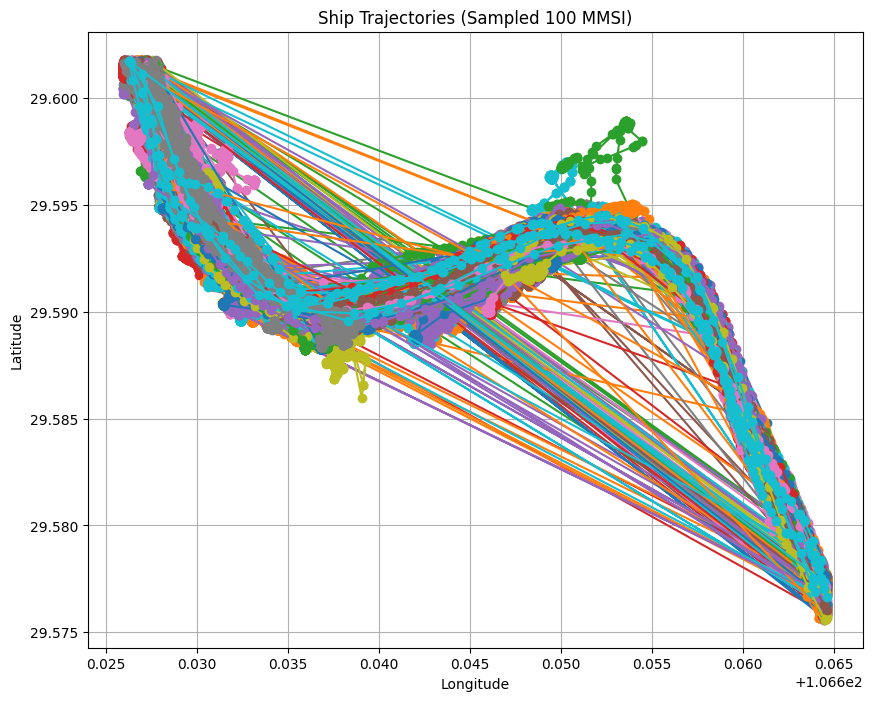

In [3]:
# 使用示例
directory_path = "data/combined_data.pkl"
df_filtered = read_and_filter_data(directory_path)
visualize_sampled_data(df_filtered)

Time taken to read the Pickle file: 0.68 seconds


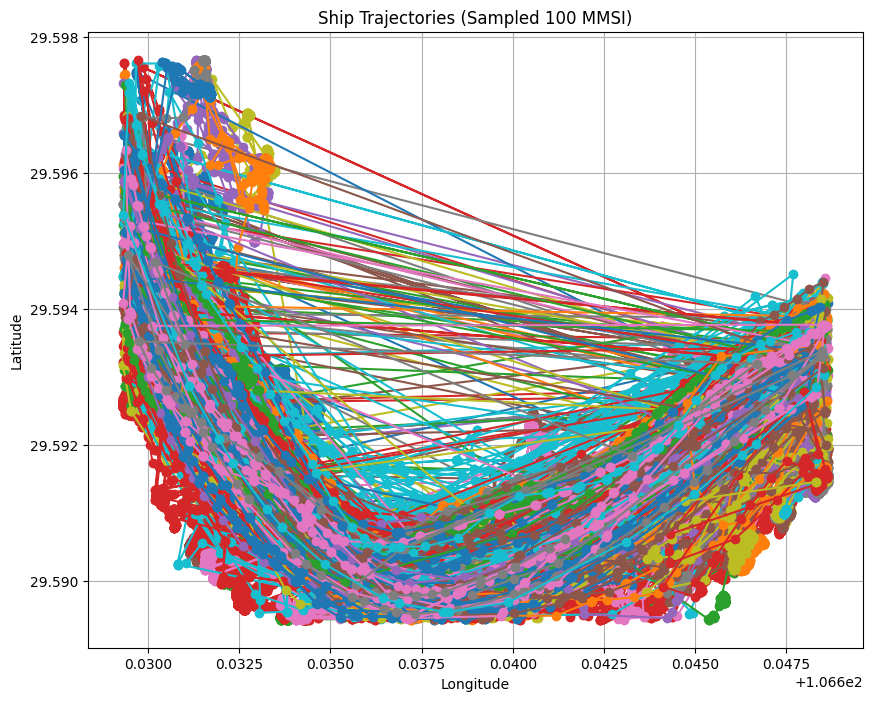

In [4]:
# 使用示例
directory_path = "data/filtered_data.pkl"
df_filtered = read_and_filter_data(directory_path)
visualize_sampled_data(df_filtered)